# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [3]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [5]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### Load Libraries

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
%matplotlib notebook
import matplotlib.pyplot as plt

### Import JSON Data as Pandas DataFrame

In [2]:
json_df = pd.read_json('data/world_bank_projects.json')

### Data Inspection

In [3]:
json_df.head(3)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en


In [4]:
print('json_df has a shape of ' + str(json_df.shape))
print(json_df.info())

json_df has a shape of (500, 50)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
le

### Excercises

#### Find the 10 countries with the most projects

<IPython.core.display.Javascript object>


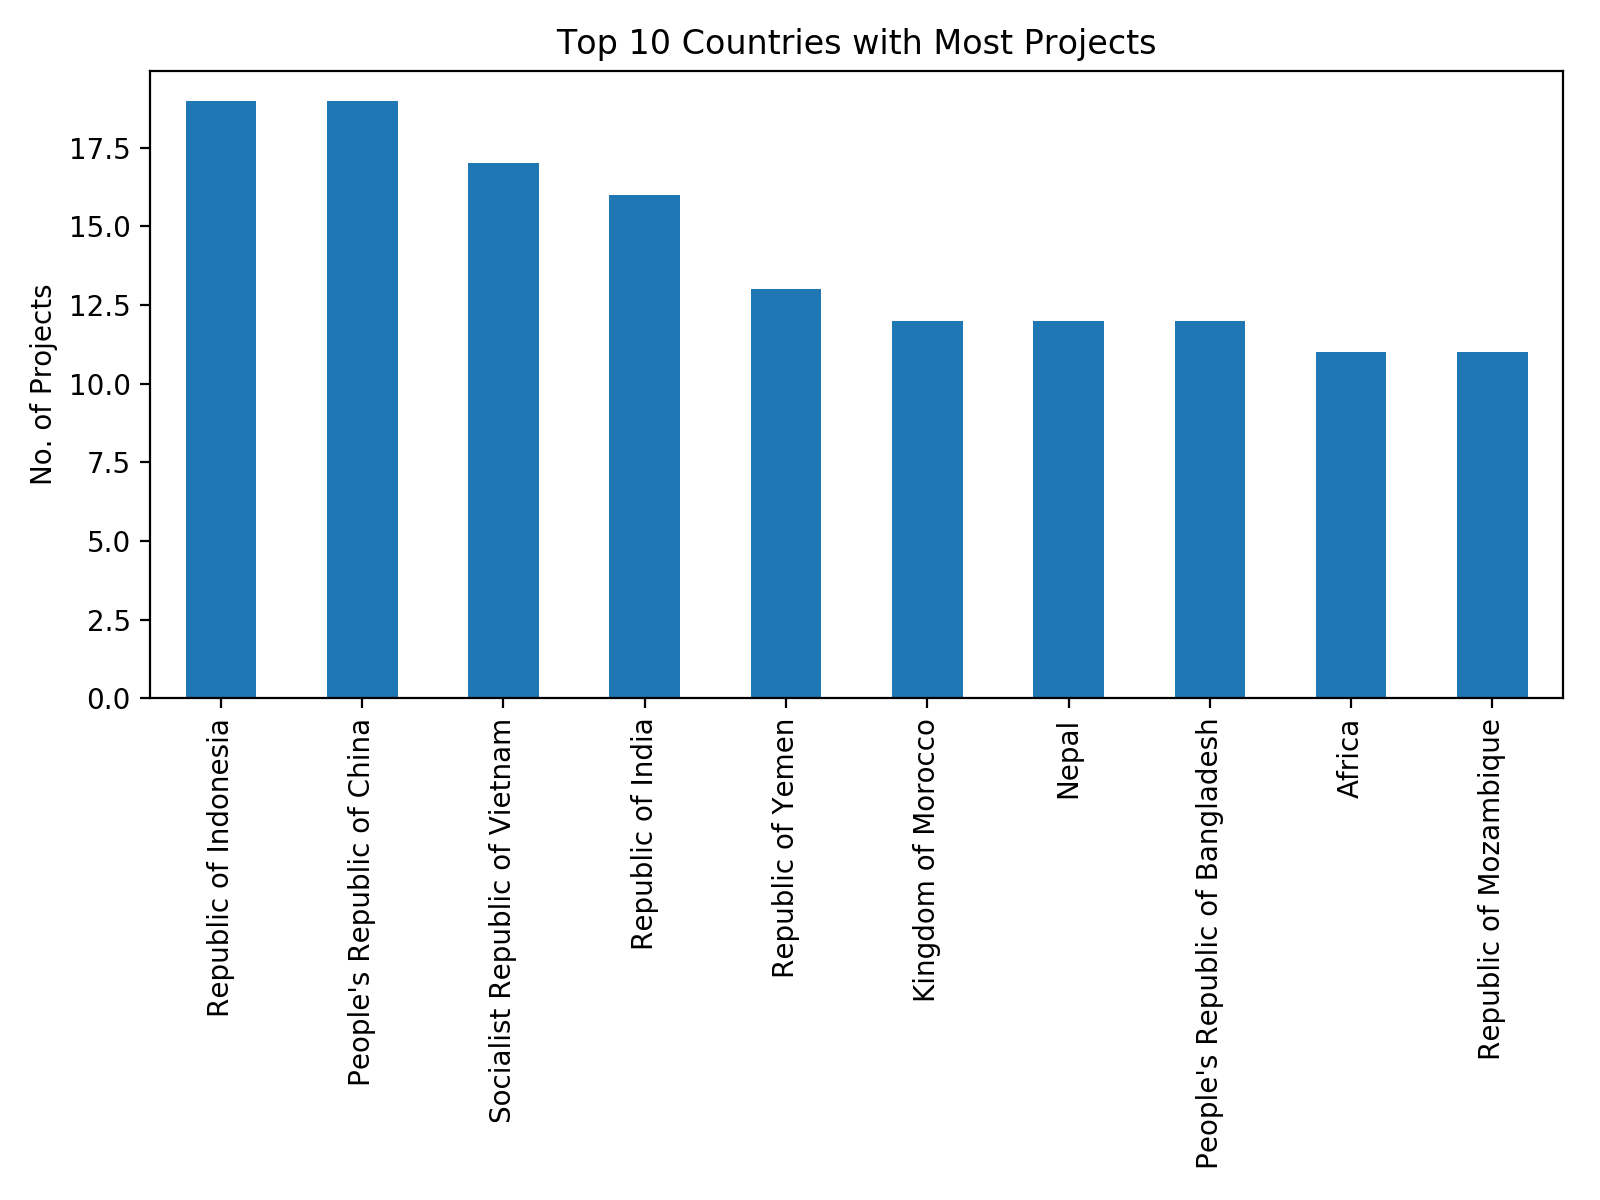

In [13]:
# count by countryname
countries_top_proj = json_df['countryname'].value_counts(ascending=False)[0:10]
# plot bar chart to show the top 10 countries
plt.figure(figsize=(8,6)) 
countries_top_proj.plot.bar()
plt.title('Top 10 Countries with Most Projects')
plt.ylabel('No. of Projects')
plt.ylim()
plt.tight_layout()
plt.show()

#### Find the top 10 major project themes (using column 'mjtheme_namecode')

<IPython.core.display.Javascript object>


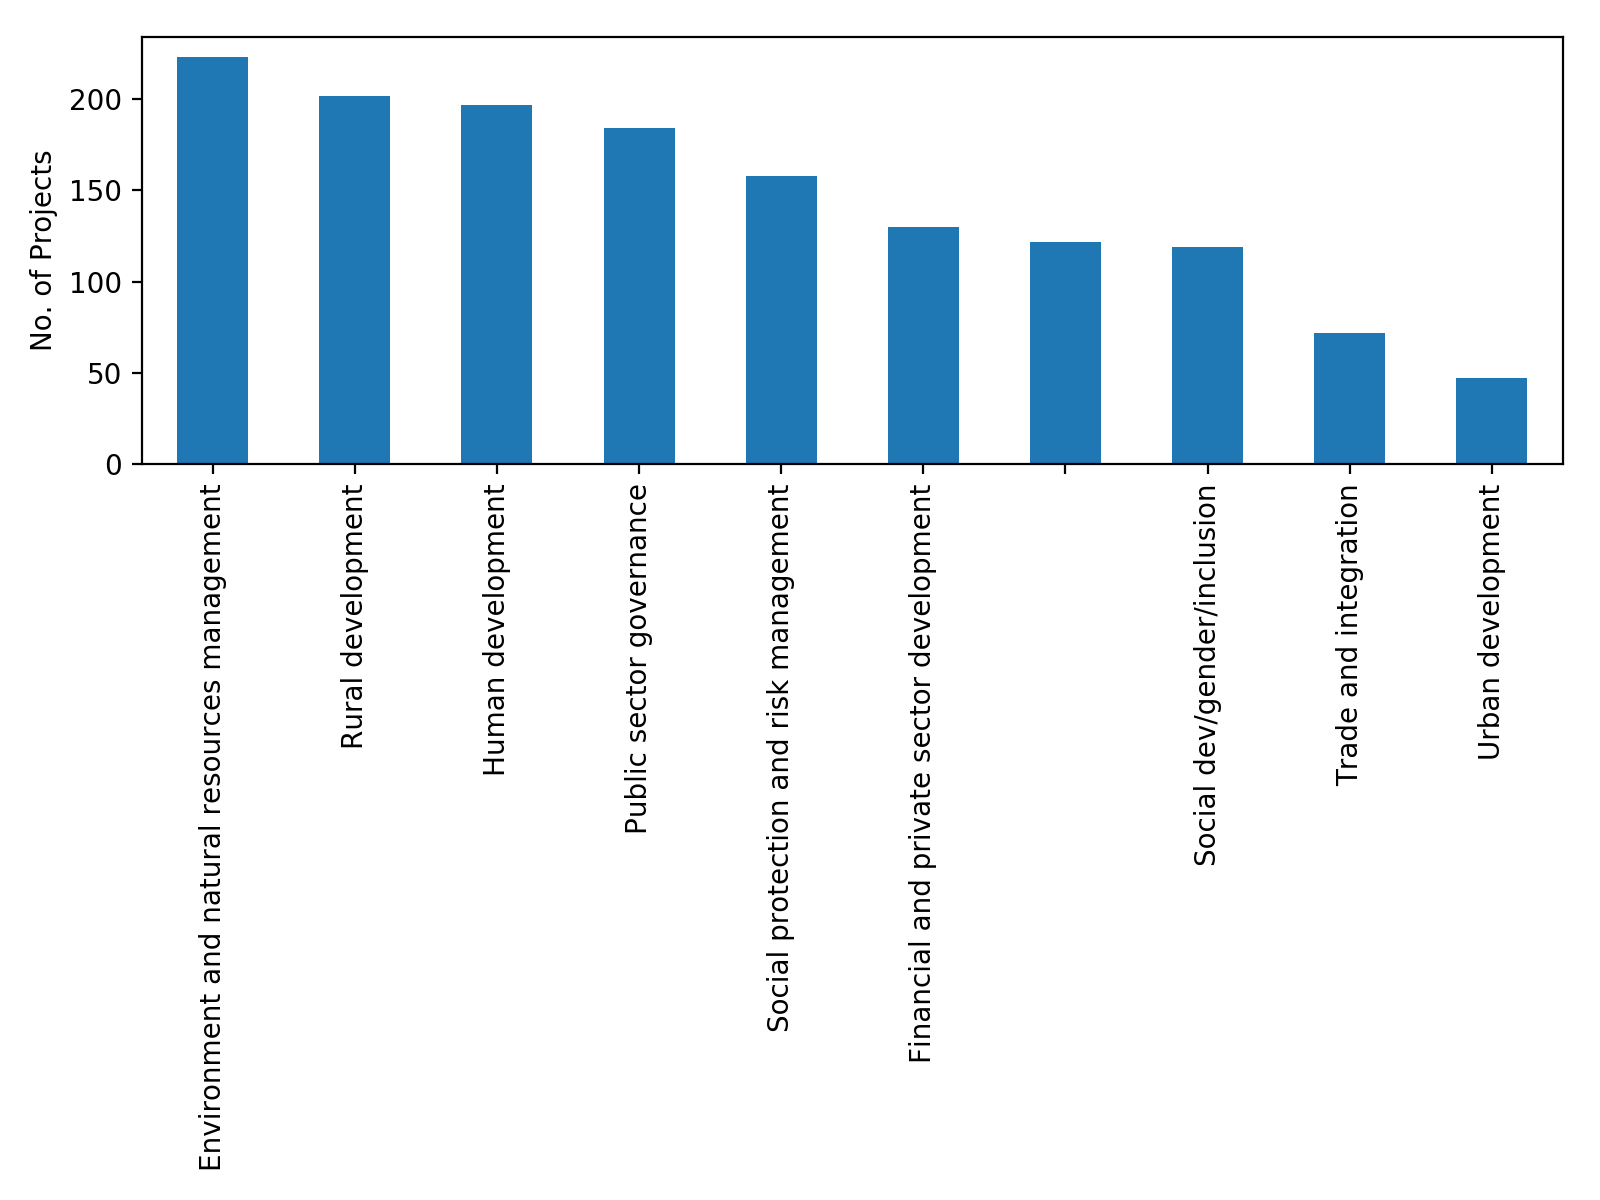

In [30]:
# read the data as JSON format
js = json.load((open('data/world_bank_projects.json')))
# use normalization to create tables from nested element
json_df2 = json_normalize(js, 'mjtheme_namecode')
# count by name, and select the top 10 elements
mj_top10 = json_df2['name'].value_counts(ascending=False)[0:10]
# plot bar chart to show the top 10 Major Project Themes
plt.figure(figsize=(8,6))
mj_top10.plot.bar()
plt.ylabel('No. of Projects')
plt.tight_layout()
plt.show()

#### Fill in Missing Values

In [69]:
# take a look at the existing dataframe, row #2 has missing 'name'
json_df2.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


##### Approach 1: Fill in the gaps by  first forming a dictionary {code:name}

In [33]:
# create an empty dictionary to save code:name pairs
dict_code_name = {}
# find a list of code values
code_list = json_df2.code.unique()
# loop through each 'code' value and find the corresponding 'name'
for i in code_list:
    # select data with a specific 'code'
    mask_code = json_df2['code']==i
    # as inspected from the data, only a few entries have missing 'name'
    # thus, it is assumed that the correct 'name' will appear the most frequently
    dict_code_name[i] = json_df2['name'][mask_code].value_counts().idxmax()
    
dict_code_name

{'1': 'Economic management',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development'}

In [68]:
# create a duplicate dataframe
json_df3 = json_df2.copy()

# loop through each row, and update the 'name' only if it is missing
for index, row in json_df3.iterrows():
    if row['name']=='':
        json_df3.loc[index,'name']=dict_code_name[row['code']]

# the 2nd row has been filled with the correct 'name'
json_df3.head()

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


##### Approach 2: Group by code, and fill in the missing values by the most frequent 'name'

In [70]:
# duplicate a dataframe with missing 'name'
json_df4 = json_df2.copy()
json_df4.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [40]:
# create 'code' and 'name' matches
df_code_name = json_df2.groupby('code').agg(lambda x: x['name'].value_counts().idxmax())
df_code_name

,name
code,
1,Economic management
10,Rural development
11,Environment and natural resources management
2,Public sector governance
3,Rule of law
4,Financial and private sector development
5,Trade and integration
6,Social protection and risk management
7,Social dev/gender/inclusion


In [67]:
# update the missing values  
for index, row in json_df4.iterrows():
    if row['name']=='':
        json_df4.loc[index,'name']=df_code_name.loc[json_df4.loc[index,'code']]['name']

# the 2nd row has been filled with the correct 'name'
json_df4.head()

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


##### END 